In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/Users/ashpreetsingh/Downloads/vacuum_cleaner_product_reviews.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,ProductID,UserID,ReviewText,Rating
0,B00002N62Y,A2LVMEG7IP5F90,good product and price,4.0
1,B00002N62Y,A3H3KQLUND2L3K,These belts are $2+ retail and some retailers/...,5.0
2,B00002N62Y,A3T5EP972YUQV0,These came in a 2 pk and are perfect fit for m...,5.0
3,B00002N62Y,AIZY1SHWZ6CIQ,"So my super fancy vacuum cleaner, the one with...",5.0
4,B00002N62Y,A28UAJTMBWQYRG,Right one for my eureka.,4.0
...,...,...,...,...
39938,B01H65P344,A2CS6YKQU31EKV,Had to return it. It didn't work right out of ...,1.0
39939,B01H65P344,A25O9X8YYVX9PB,"Great product, works well as a replacement bat...",5.0
39940,B01H65P344,AZPDJA3OM7CEV,Works as well as the Dyson one!,5.0
39941,B01H65P344,A2ASONGJCSONZR,Works great with my Dyson DC 31. So far the ba...,5.0


In [5]:
grouped_ratings = df.groupby('Rating').count()['ProductID']

<AxesSubplot:xlabel='Rating'>

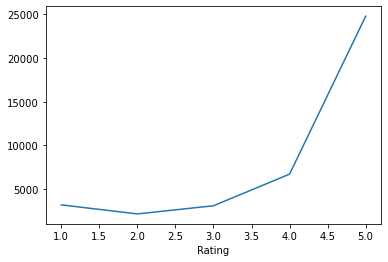

In [6]:
grouped_ratings.plot()

### this show that more reviews have a rating of 5 or 4

In [7]:
df['length of review'] = df['ReviewText'].apply(len)

In [8]:
length_vs_rating = df.groupby('Rating').count()['length of review']

<AxesSubplot:xlabel='Rating'>

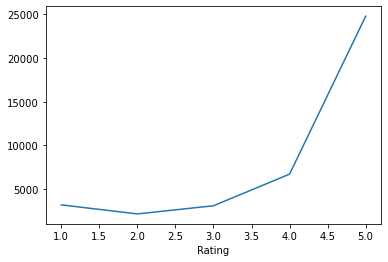

In [9]:
length_vs_rating.plot()

This shows that the higher the length of the review the better the rating

In [10]:
length_vs_rating

Rating
1.0     3192
2.0     2158
3.0     3091
4.0     6714
5.0    24788
Name: length of review, dtype: int64

In [11]:
def analysed(val):
    if val==3:
        return "Avg"
    if val<=2:
        return "Poor"
    if val>=4:
        return "Good"

In [12]:
df['rating_type'] = df['Rating'].apply(analysed)

In [13]:
df['ProductID'].nunique()

739

this shows that the above dataset have 739 unique products

<AxesSubplot:xlabel='rating_type', ylabel='count'>

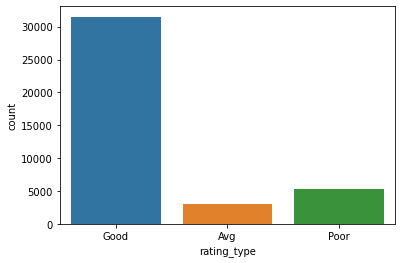

In [14]:
sns.countplot(x='rating_type',data=df)

In [15]:
df.groupby('ProductID')['Rating'].mean().sort_values(ascending=False).head()

ProductID
B00KZN5PC0    5.0
B00N2DJ4BS    5.0
B0012XUYJ6    5.0
B009SC81AW    5.0
B0013J6C2C    5.0
Name: Rating, dtype: float64

the above shows the top 5 products with best ratings

In [16]:
df['ProductID'].value_counts().head()

B001PB8EJ2    2306
B0016NP14A    1516
B0014SQVKK    1421
B00OHTKVM2    1334
B00002N8CX    1314
Name: ProductID, dtype: int64

the above shows the top 5 most reviewed products

In [17]:
df[df['ProductID']=='B001PB8EJ2']['Rating'].mean()

4.332176929748482

the most number of times reviewed product has rating of 4.33

In [18]:
df['ProductID'].value_counts().sort_values().head()

B0012XUYJ6    1
B0015YULO0    3
B0013J6C2C    3
B00106TGAS    3
B01FLG3ONW    4
Name: ProductID, dtype: int64

In [19]:
df[df['ProductID']=='B0012XUYJ6']

,ProductID,UserID,ReviewText,Rating,length of review,rating_type
39819,B0012XUYJ6,AEJOU14WZAGWF,I bought this vacuum because I have two dogs a...,5.0,1261,Good


the above product is only reviewed once

In [20]:
df[df['ProductID']=='B0012XUYJ6']['ReviewText'].iloc[0]

"I bought this vacuum because I have two dogs and found I am allergic to dog dander.  This vacuum has a sealed system and it doesn't have the leaks that other vacuums have around the exit system filters.  It has a Small HEPA filter that gets replaced every four bags(and comes in the box of 4 bags).  It has a very hefty charcoal filter as well just like a room air cleaner(replaced one a year).  It doesn't reciruclate the dustmite feces back in the air.  It captures it.  After the first use the house smelled better because of the charcoal filter as well.  It has great suction and picks up the hair far faster than my old Electrolux.  I can't say enough about how much we like this vacuum.\n\nIt came with three cleaning heads. The carpet with the rotating head, the regular hardwood floor head (fits great right up to the walls and corners) and picks up everything.  It also has a small rotating handheld head  that is great on furniture and stairs.\n\nIt is a pricy vacuum. It was worth every l

review for the product id - B0012XUYJ6

In [21]:
from nltk.stem import PorterStemmer

In [22]:
from nltk.tokenize import word_tokenize

In [23]:
porter = PorterStemmer()

In [24]:
def stem_func(review):
    words = word_tokenize(review)
    stemmed_words = []
    for word in words:
        stemmed_words.append(porter.stem(word))
    stemmed_text = " ".join(stemmed_words)
    return stemmed_text

In [25]:
df['ReviewText'].apply(stem_func)

0                                   good product and price
1        these belt are $ 2+ retail and some retailers/...
2        these came in a 2 pk and are perfect fit for m...
3        so my super fanci vacuum cleaner , the one wit...
4                                right one for my eureka .
                               ...                        
39938    had to return it . it did n't work right out o...
39939    great product , work well as a replac batteri ...
39940                      work as well as the dyson one !
39941    work great with my dyson dc 31 . so far the ba...
39942    thi work just fine on my dyson and a realli go...
Name: ReviewText, Length: 39943, dtype: object

In [26]:
from nltk.corpus import stopwords

In [27]:
stopwordlist = stopwords.words('english')

In [28]:
import string

In [29]:
corpus = []

In [30]:
def remove_stop_words(review_text):
    review_text = review_text.lower()
    for punctuation in string.punctuation:
        review_text = review_text.replace(punctuation, '')
    words = review_text.split()
    string1 = ""
    for word in words:
        if word.lower() in stopwordlist:
            pass
        else:
            string1=string1+" "+word
    corpus.append(string1)
    return string1

In [31]:
df['new_review'] = df['ReviewText'].apply(remove_stop_words)

In [32]:
df

,ProductID,UserID,ReviewText,Rating,length of review,rating_type,new_review
0,B00002N62Y,A2LVMEG7IP5F90,good product and price,4.0,22,Good,good product price
1,B00002N62Y,A3H3KQLUND2L3K,These belts are $2+ retail and some retailers/...,5.0,130,Good,belts 2 retail retailerssellers use genericno...
2,B00002N62Y,A3T5EP972YUQV0,These came in a 2 pk and are perfect fit for m...,5.0,127,Good,came 2 pk perfect fit good old vac seem stron...
3,B00002N62Y,AIZY1SHWZ6CIQ,"So my super fancy vacuum cleaner, the one with...",5.0,2098,Good,super fancy vacuum cleaner one cold fusion re...
4,B00002N62Y,A28UAJTMBWQYRG,Right one for my eureka.,4.0,24,Good,right one eureka
...,...,...,...,...,...,...,...
39938,B01H65P344,A2CS6YKQU31EKV,Had to return it. It didn't work right out of ...,1.0,54,Poor,return didnt work right box
39939,B01H65P344,A25O9X8YYVX9PB,"Great product, works well as a replacement bat...",5.0,61,Good,great product works well replacement battery ...
39940,B01H65P344,AZPDJA3OM7CEV,Works as well as the Dyson one!,5.0,31,Good,works well dyson one
39941,B01H65P344,A2ASONGJCSONZR,Works great with my Dyson DC 31. So far the ba...,5.0,101,Good,works great dyson dc 31 far battery good char...


In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [34]:
def senti_adder(review):
    return sia.polarity_scores(review)['compound']

In [35]:
df['compound_scores'] = df['ReviewText'].apply(senti_adder)

<AxesSubplot:xlabel='Rating', ylabel='compound_scores'>

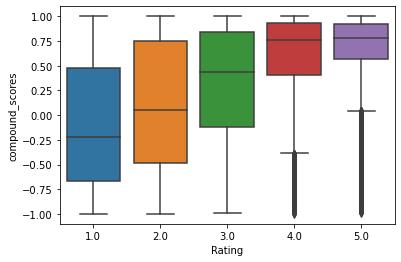

In [36]:
sns.boxplot(x=df['Rating'],y=df['compound_scores'])

In [37]:
df

,ProductID,UserID,ReviewText,Rating,length of review,rating_type,new_review,compound_scores
0,B00002N62Y,A2LVMEG7IP5F90,good product and price,4.0,22,Good,good product price,0.4404
1,B00002N62Y,A3H3KQLUND2L3K,These belts are $2+ retail and some retailers/...,5.0,130,Good,belts 2 retail retailerssellers use genericno...,0.0000
2,B00002N62Y,A3T5EP972YUQV0,These came in a 2 pk and are perfect fit for m...,5.0,127,Good,came 2 pk perfect fit good old vac seem stron...,0.9446
3,B00002N62Y,AIZY1SHWZ6CIQ,"So my super fancy vacuum cleaner, the one with...",5.0,2098,Good,super fancy vacuum cleaner one cold fusion re...,0.9828
4,B00002N62Y,A28UAJTMBWQYRG,Right one for my eureka.,4.0,24,Good,right one eureka,0.0000
...,...,...,...,...,...,...,...,...
39938,B01H65P344,A2CS6YKQU31EKV,Had to return it. It didn't work right out of ...,1.0,54,Poor,return didnt work right box,0.0000
39939,B01H65P344,A25O9X8YYVX9PB,"Great product, works well as a replacement bat...",5.0,61,Good,great product works well replacement battery ...,0.8932
39940,B01H65P344,AZPDJA3OM7CEV,Works as well as the Dyson one!,5.0,31,Good,works well dyson one,0.3382
39941,B01H65P344,A2ASONGJCSONZR,Works great with my Dyson DC 31. So far the ba...,5.0,101,Good,works great dyson dc 31 far battery good char...,0.8834


In [38]:
df['UserID'].nunique()

34244

the above cell shows there are 34244 users who have recieved different kinds of products

In [39]:
df['UserID'].value_counts()

A2ZY49IDE6TY5I    7
A2R1HUYHXV7H18    6
A100WO06OQR8BQ    6
A17HMM1M7T9PJ1    6
A3963R7EPE3A7E    6
                 ..
A3D8MRAS52BT2F    1
A39DM8XANM7BYG    1
A3E4LQR8F32NI1    1
AK0NFAAF2U3OF     1
A2RPCMI5Q7ZZF3    1
Name: UserID, Length: 34244, dtype: int64

one of the customers wrote 7 reviews 

In [40]:
df[df['UserID']=='A2ZY49IDE6TY5I']

,ProductID,UserID,ReviewText,Rating,length of review,rating_type,new_review,compound_scores
12217,B001EFMD8W,A2ZY49IDE6TY5I,"Already own one Dyson, so getting a second one...",5.0,1680,Good,already one dyson getting second one difficul...,0.8503
16602,B002D47XO2,A2ZY49IDE6TY5I,I have owned this rechargeable handvac for alm...,4.0,1510,Good,owned rechargeable handvac almost year purcha...,0.9756
26089,B00FN1KKME,A2ZY49IDE6TY5I,"This took a few hours to charge, but I wasn't ...",4.0,612,Good,took hours charge wasnt spending time figurin...,0.7447
27808,B00HNUFSLG,A2ZY49IDE6TY5I,This Dyson has replaced an inexpensive Hoover ...,5.0,2253,Good,dyson replaced inexpensive hoover windtunnel ...,0.9962
32443,B00R43I3XW,A2ZY49IDE6TY5I,The C1 Delphi is a surprisingly compact and ni...,5.0,3304,Good,c1 delphi surprisingly compact nimble caniste...,0.9989
34180,B00SMLJYC4,A2ZY49IDE6TY5I,I already own a compact Dyson that is very lig...,5.0,2116,Good,already compact dyson light well compact comp...,0.7659
34622,B00SO8P0AA,A2ZY49IDE6TY5I,This set contains all the frequently replaced ...,5.0,242,Good,set contains frequently replaced agraveccesso...,0.2960


here is the list of the 7 reviews 

<AxesSubplot:>

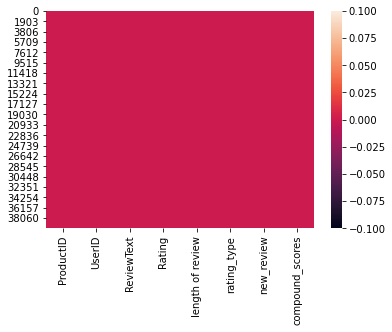

In [41]:
sns.heatmap(df.isna())

this shows there are no null values inside the dataset

<AxesSubplot:>

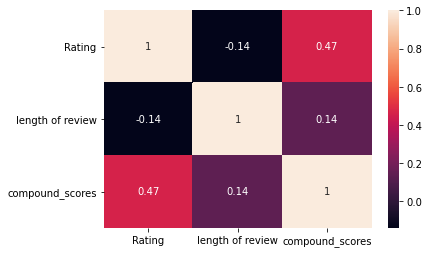

In [42]:
sns.heatmap(df.corr(),annot=True)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv = CountVectorizer()

In [49]:
data = cv.fit_transform(corpus).toarray()

In [50]:
X = data
y = df['Rating']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
nb = MultinomialNB()

In [55]:
nb.fit(X_train,y_train)

MultinomialNB()

In [56]:
pred = nb.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(confusion_matrix(y_test,pred))

[[ 587   10   19  124  517]
 [ 152   36   30  176  453]
 [  93    4   59  322  794]
 [  42    6   17  544 2135]
 [  50    9   23  271 9505]]


In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         1.0       0.64      0.47      0.54      1257
         2.0       0.55      0.04      0.08       847
         3.0       0.40      0.05      0.08      1272
         4.0       0.38      0.20      0.26      2744
         5.0       0.71      0.96      0.82      9858

    accuracy                           0.67     15978
   macro avg       0.54      0.34      0.36     15978
weighted avg       0.61      0.67      0.60     15978



In [77]:
df.columns

Index(['ProductID', 'UserID', 'ReviewText', 'Rating', 'length of review',
       'rating_type', 'new_review', 'compound_scores'],
      dtype='object')

In [78]:
pred

array([5., 1., 5., ..., 5., 5., 4.])

In [84]:
y_test

26668    5.0
18391    1.0
33322    3.0
29030    4.0
8929     1.0
        ... 
39396    1.0
782      5.0
20209    4.0
9181     5.0
35366    3.0
Name: Rating, Length: 15978, dtype: float64